# **LEVEL-3**

## Task1: Predictive Modeling
### Build a regression model to predict the aggregate rating of a restaurant based on available features.
### Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
### Experiment with different algorithms (e.g.,linear regression, decision trees, random forest) and compare their performance.

In [2]:
%config InlineBackend.figure_format = 'retina' 
import pandas as pd

In [4]:
df = pd.read_csv('dataset_cleaned.csv', encoding='utf-8')

In [6]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [8]:
df.tail()

Restaurant ID            Restaurant Name  Country Code     City  \
9380        5800710  The Manhattan Fish Market           191  Colombo   
9381        5800433                 The Sizzle           191  Colombo   
9382        5800176           Ministry of Crab           191  Colombo   
9383        5801321               Cafe Beverly           191  Colombo   
9384        5800612              Burger's King           191  Colombo   

                                                Address  \
9380  31, Deal Place, Off R.A. De Mel Mawatha, Kollu...   
9381       32, Walukarama Road, Kollupitiya, Colombo 03   
9382       Old Colombo Dutch Hospital, Fort, Colombo 01   
9383  475/C, Sri Jayawardenapura Mawatha, Welikada, ...   
9384       1, Vellons Passage, Slave Island, Colombo 02   

                      Locality                   Locality Verbose  Longitude  \
9380   Kollupitiya, Colombo 03   Kollupitiya, Colombo 03, Colombo  79.853364   
9381   Kollupitiya, Colombo 03   Kollupitiya, Colombo 03, Colombo  79.852928   
9382  Old Dutch Hospital, Fort  Old Dutch Hospital, Fort, Colombo  79.844239   
9383       Rajagiriya, Colombo       Rajagiriya, Colombo, Colombo  79.902941   
9384  Slave Island, Colombo 02  Slave Island, Colombo 02, Colombo  79.850748   

      Latitude                               Cuisines  ...  \
9380  6.906814                       Seafood, Italian  ...   
9381  6.904581  American, Fast Food, Steak, Beverages  ...   
9382  6.932814                                Seafood  ...   
9383  6.906815                  Continental, American  ...   
9384  6.923933                              Fast Food  ...   

                   Currency Has Table booking Has Online delivery  \
9380  Sri Lankan Rupee(LKR)                No                  No   
9381  Sri Lankan Rupee(LKR)                No                  No   
9382  Sri Lankan Rupee(LKR)                No                  No   
9383  Sri Lankan Rupee(LKR)                No                  No   
9384  Sri Lankan Rupee(LKR)                No                  No   

     Is delivering now Switch to order menu Price range  Aggregate rating  \
9380                No                   No           4               4.0   
9381                No                   No           3               4.2   
9382                No                   No           4               4.9   
9383                No                   No           3               4.1   
9384                No                   No           2               4.1   

      Rating color Rating text Votes  
9380         Green   Very Good   196  
9381         Green   Very Good   286  
9382    Dark Green   Excellent   203  
9383         Green   Very Good    58  
9384         Green   Very Good   199  

[5 rows x 21 columns]

In [10]:
def approx_to_50(value):
    remainder = value % 50
    if remainder < 25:
        return value - remainder
    else:
        return value + (50 - remainder)

In [12]:
df['Votes'] = df['Votes'].apply(approx_to_50)

In [14]:
df['Average Cost for two'] = df['Average Cost for two'].apply(approx_to_50)

In [16]:
df['Cuisines'] = df['Cuisines'].str.split(',')

In [18]:
df.shape

(9385, 21)

In [20]:
df = df.explode('Cuisines').reset_index(drop = True)

In [22]:
df.shape

(19374, 21)

In [24]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6317637        Le Petit Souffle           162       Makati City   
2        6317637        Le Petit Souffle           162       Makati City   
3        6304287        Izakaya Kikufuji           162       Makati City   
4        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Third Floor, Century City Mall, Kalayaan Avenu...   
2  Third Floor, Century City Mall, Kalayaan Avenu...   
3  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
4  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1   Century City Mall, Poblacion, Makati City   
2   Century City Mall, Poblacion, Makati City   
3  Little Tokyo, Legaspi Village, Makati City   
4  Edsa Shangri-La, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
2  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
3  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
4  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   

    Cuisines  ...          Currency Has Table booking Has Online delivery  \
0     French  ...  Botswana Pula(P)               Yes                  No   
1   Japanese  ...  Botswana Pula(P)               Yes                  No   
2   Desserts  ...  Botswana Pula(P)               Yes                  No   
3   Japanese  ...  Botswana Pula(P)               Yes                  No   
4    Seafood  ...  Botswana Pula(P)               Yes                  No   

  Is delivering now Switch to order menu Price range  Aggregate rating  \
0                No                   No           3               4.8   
1                No                   No           3               4.8   
2                No                   No           3               4.8   
3                No                   No           3               4.5   
4                No                   No           4               4.4   

   Rating color Rating text Votes  
0    Dark Green   Excellent   300  
1    Dark Green   Excellent   300  
2    Dark Green   Excellent   300  
3    Dark Green   Excellent   600  
4         Green   Very Good   250  

[5 rows x 21 columns]

In [26]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [28]:
inputs = df.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Currency',
                  'Rating color','Aggregate rating',
        'Is delivering now', 'Switch to order menu'],axis = 'columns')

In [30]:
inputs

Cuisines  Average Cost for two Has Table booking  \
0           French                  1100               Yes   
1         Japanese                  1100               Yes   
2         Desserts                  1100               Yes   
3         Japanese                  1200               Yes   
4          Seafood                  4000               Yes   
...            ...                   ...               ...   
19369    Beverages                  3000                No   
19370      Seafood                  4000                No   
19371  Continental                  2000                No   
19372     American                  2000                No   
19373    Fast Food                  1000                No   

      Has Online delivery  Price range Rating text  Votes  
0                      No            3   Excellent    300  
1                      No            3   Excellent    300  
2                      No            3   Excellent    300  
3                      No            3   Excellent    600  
4                      No            4   Very Good    250  
...                   ...          ...         ...    ...  
19369                  No            3   Very Good    300  
19370                  No            4   Excellent    200  
19371                  No            3   Very Good     50  
19372                  No            3   Very Good     50  
19373                  No            2   Very Good    200  

[19374 rows x 7 columns]

In [32]:
inputs["Cuisines"].nunique()

236

In [34]:
inputs["Rating text"].nunique()

6

In [36]:
valu = df["Average Cost for two"].value_counts().sort_values(ascending=False).head(10)
valu

Average Cost for two
500    1982
400    1659
300    1509
600    1490
200    1024
350     892
700     879
50      877
800     825
250     775
Name: count, dtype: int64

In [38]:
inputs.head()

Cuisines  Average Cost for two Has Table booking Has Online delivery  \
0     French                  1100               Yes                  No   
1   Japanese                  1100               Yes                  No   
2   Desserts                  1100               Yes                  No   
3   Japanese                  1200               Yes                  No   
4    Seafood                  4000               Yes                  No   

   Price range Rating text  Votes  
0            3   Excellent    300  
1            3   Excellent    300  
2            3   Excellent    300  
3            3   Excellent    600  
4            4   Very Good    250

In [40]:
# inputs = pd.get_dummies(df, columns=['city', 'cuisines', 'currency', 'has_table_booking', 'has_online_delivery'])

In [42]:
from sklearn.preprocessing import LabelEncoder
le_online = LabelEncoder()
le_table = LabelEncoder()
le_ratingtext = LabelEncoder()


In [43]:
inputs.columns

Index(['Cuisines', 'Average Cost for two', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Rating text', 'Votes'],
      dtype='object')

In [44]:
inputs['Has Online delivery_n'] = le_online.fit_transform(inputs['Has Online delivery'])
inputs['Has Table booking_n'] = le_table.fit_transform(inputs['Has Table booking'])
inputs['Rating text_n'] = le_ratingtext.fit_transform(inputs['Rating text'])

In [45]:
inputs.head()

Cuisines  Average Cost for two Has Table booking Has Online delivery  \
0     French                  1100               Yes                  No   
1   Japanese                  1100               Yes                  No   
2   Desserts                  1100               Yes                  No   
3   Japanese                  1200               Yes                  No   
4    Seafood                  4000               Yes                  No   

   Price range Rating text  Votes  Has Online delivery_n  Has Table booking_n  \
0            3   Excellent    300                      0                    1   
1            3   Excellent    300                      0                    1   
2            3   Excellent    300                      0                    1   
3            3   Excellent    600                      0                    1   
4            4   Very Good    250                      0                    1   

   Rating text_n  
0              1  
1              1  
2              1  
3              1  
4              5

In [50]:
inputs.head()

Cuisines  Average Cost for two Has Table booking Has Online delivery  \
0     French                  1100               Yes                  No   
1   Japanese                  1100               Yes                  No   
2   Desserts                  1100               Yes                  No   
3   Japanese                  1200               Yes                  No   
4    Seafood                  4000               Yes                  No   

   Price range Rating text  Votes  Has Online delivery_n  Has Table booking_n  \
0            3   Excellent    300                      0                    1   
1            3   Excellent    300                      0                    1   
2            3   Excellent    300                      0                    1   
3            3   Excellent    600                      0                    1   
4            4   Very Good    250                      0                    1   

   Rating text_n  
0              1  
1              1  
2              1  
3              1  
4              5

In [52]:
inputs.drop(['Rating text','Has Online delivery','Has Table booking'],axis = 1 ,inplace = True)

In [54]:
inputs.head()

Cuisines  Average Cost for two  Price range  Votes  Has Online delivery_n  \
0     French                  1100            3    300                      0   
1   Japanese                  1100            3    300                      0   
2   Desserts                  1100            3    300                      0   
3   Japanese                  1200            3    600                      0   
4    Seafood                  4000            4    250                      0   

   Has Table booking_n  Rating text_n  
0                    1              1  
1                    1              1  
2                    1              1  
3                    1              1  
4                    1              5

In [56]:
target = df["Aggregate rating"]

In [58]:
X = pd.get_dummies(inputs[['Cuisines', 'Average Cost for two', 'Price range', 'Votes','Has Online delivery_n','Has Table booking_n', 'Rating text_n']])
y = target

In [60]:
X.head()

Average Cost for two  Price range  Votes  Has Online delivery_n  \
0                  1100            3    300                      0   
1                  1100            3    300                      0   
2                  1100            3    300                      0   
3                  1200            3    600                      0   
4                  4000            4    250                      0   

   Has Table booking_n  Rating text_n  Cuisines_ Afghani  Cuisines_ African  \
0                    1              1              False              False   
1                    1              1              False              False   
2                    1              1              False              False   
3                    1              1              False              False   
4                    1              5              False              False   

   Cuisines_ American  Cuisines_ Andhra  ...  Cuisines_Sushi  \
0               False             False  ...           False   
1               False             False  ...           False   
2               False             False  ...           False   
3               False             False  ...           False   
4               False             False  ...           False   

   Cuisines_Taiwanese  Cuisines_Tapas  Cuisines_Tea  Cuisines_Tex-Mex  \
0               False           False         False             False   
1               False           False         False             False   
2               False           False         False             False   
3               False           False         False             False   
4               False           False         False             False   

   Cuisines_Thai  Cuisines_Tibetan  Cuisines_Turkish  Cuisines_Vietnamese  \
0          False             False             False                False   
1          False             False             False                False   
2          False             False             False                False   
3          False             False             False                False   
4          False             False             False                False   

   Cuisines_Western  
0             False  
1             False  
2             False  
3             False  
4             False  

[5 rows x 242 columns]

In [62]:
# X.tail()

In [64]:
%config InlineBackend.figure_format = 'retina' 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [66]:
# from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, random_state=42)

In [67]:
y_pred = model.predict(X_test)

In [68]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))  # 1.0 = perfect fit


Mean Squared Error: 0.105627772224202
Mean Absolute Error: 0.2073751759817649
R² Score: 0.9439819567239642


In [74]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
# 3. Predict
y_pred2 = model2.predict(X_test)

In [75]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred2))  # 1.0 = perfect fit

Mean Squared Error: 0.105627772224202
Mean Absolute Error: 0.2073751759817649
R² Score: 0.9821779407490343


In [76]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=3, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100,max_depth=10,random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
    "KNN": KNeighborsRegressor(n_neighbors=10)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name}: R² Score ={r2_score(y_test, preds):.2f}, MAE={mean_absolute_error(y_test, preds):.2f}")
    print()


Linear Regression: R² Score =-3088184844329.84, MAE=38765.99

Decision Tree: R² Score =0.94, MAE=0.21

Random Forest: R² Score =0.98, MAE=0.13

Gradient Boosting: R² Score =0.98, MAE=0.13

KNN: R² Score =0.91, MAE=0.22



In [77]:
import plotly.graph_objects as go
models = {
    # "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=3, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
    "KNN": KNeighborsRegressor(n_neighbors=10)
}

# Store results
model_names = []
r2_scores = []
maes = []

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)

    model_names.append(name)
    r2_scores.append(r2)
    maes.append(mae)



In [78]:

fig = go.Figure()

fig.add_trace(go.Bar(
    x=model_names,
    y=r2_scores,
    name='R² Score',
    marker_color='green',
    text=[f"{score:.2f}" for score in r2_scores],
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=model_names,
    y=maes,
    name='MAE',
    marker_color='red',
    text=[f"{score:.2f}" for score in maes],
    textposition='auto'
))

# Layout details
fig.update_layout(
    title='🔥Model Performance Comparison',
    xaxis_title='Model',
    yaxis_title='Score',
    barmode='group',
    template='plotly_dark',
    height=500
)

fig.show()

## Task 2: Customer Preference Analysis
### Analyze the relationship between the type of cuisine and the restaurant's rating.
### Identify the most popular cuisines among customers based on the number of votes.
### Determine if there are any specific cuisines that tend to receive higher ratings.

In [80]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [82]:
top_cuisines.head(50)

Cuisines  Rating
0       SUNDA     4.9
1   TAIWANESE     4.6
2     PERSIAN     4.6
3       RAMEN     4.5
4   BRAZILIAN     4.5
5     DIM SUM     4.5
6    HAWAIIAN     4.4
7  BUBBLE TEA     4.4
8       CURRY     4.4
9    FILIPINO     4.3

In [83]:
df['Cuisines'] = df['Cuisines'].str.strip().str.upper()
cuisine_votes = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
top_cuisines = cuisine_votes.head(10).reset_index()
top_cuisines.columns = ["Cuisines","Votes"]
fig = px.bar(
    top_cuisines,
    x="Votes",
    y="Cuisines",
    # orientation='v',
    labels={'Votes': 'Total Votes', 'Cuisines': 'Cuisine'},
    title='Top 10 Cuisines by Votes of Customer',
    color='Votes',
    color_continuous_scale='Plasma'
)

# Styling the plot
fig.update_layout(
    xaxis_title="Cuisine",
    yaxis_title="Votes",
    coloraxis_showscale=False,
    plot_bgcolor='rgba(0,0,0,0)',
    height = 500,
    width = 1000
)

fig.show()


In [84]:
correlation = df["Aggregate rating"].corr(df["Votes"])
print(f"Correlation between Rating and Votes: {correlation:.4f}")

Correlation between Rating and Votes: 0.3144


In [85]:
df_clean = df[(df['Votes'] > 0) & (df['Aggregate rating'] > 0)]
cuisines_grouped = df_clean.groupby('Cuisines').agg({
    'Restaurant Name': 'count',
    'Votes':'sum',
    'Aggregate rating': 'mean'
}).reset_index()

cuisines_grouped.columns = ['Cuisines', 'Number of Restaurants', 'Votes','Average Rating']

top_10_cuisines = cuisines_grouped.sort_values(
    by=['Number of Restaurants'],
    ascending=False
).head(10)

top_10_cuisines = top_10_cuisines.round(2)
print(top_10_cuisines)


         Cuisines  Number of Restaurants   Votes  Average Rating
92   NORTH INDIAN                   2004  585900            3.44
32        CHINESE                   1507  358300            3.41
45      FAST FOOD                   1020  179550            3.38
65        ITALIAN                    644  321300            3.78
35    CONTINENTAL                    583  282250            3.79
87        MUGHLAI                    566  150750            3.37
26           CAFE                    489  170050            3.79
39       DESSERTS                    361   98100            3.76
2        AMERICAN                    359  181100            3.79
113  SOUTH INDIAN                    333   80100            3.36


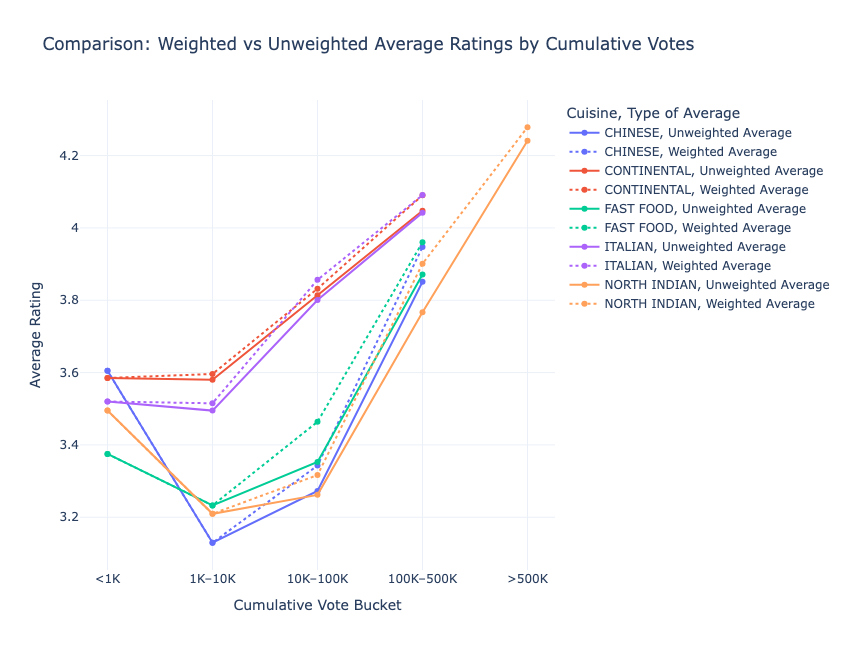

In [86]:
import pandas as pd
import plotly.express as px

# Step 1: Filter valid ratings and votes
df_clean = df[(df['Votes'] > 0) & (df['Aggregate rating'] > 0)]

# Step 2: Focus on top cuisines
top_cuisines = df_clean['Cuisines'].value_counts().head(5).index
df_top = df_clean[df_clean['Cuisines'].isin(top_cuisines)].copy()

# Step 3: Sort and compute cumulative votes per cuisine
df_top.sort_values(by=['Cuisines', 'Votes'], inplace=True)
df_top['Cumulative Votes'] = df_top.groupby('Cuisines')['Votes'].cumsum()

# Step 4: Define cumulative vote bins
bins = [0, 1000, 10000, 100000,500000, float('inf')]
labels = ['<1K', '1K–10K', '10K–100K', '100K–500K', '>500K']
df_top['Vote Bin'] = pd.cut(df_top['Cumulative Votes'], bins=bins, labels=labels)

# Step 5A: Unweighted average
unweighted_df = df_top.groupby(['Cuisines', 'Vote Bin'], observed=True).agg({
    'Aggregate rating': 'mean',
    'Cumulative Votes': 'max',
    'Restaurant Name': 'count'
}).reset_index()
unweighted_df.rename(columns={
    'Aggregate rating': 'Unweighted Average',
    'Restaurant Name': 'Restaurants in Bin'
}, inplace=True)

# Step 5B: Weighted average (clean and warning-free)
grouped = df_top.groupby(['Cuisines', 'Vote Bin'], observed=True)

weighted_results = []
for (cuisine, bin_), group in grouped:
    total_votes = group['Votes'].sum()
    weighted_rating = (group['Aggregate rating'] * group['Votes']).sum() / total_votes if total_votes > 0 else 0
    weighted_results.append({
        'Cuisines': cuisine,
        'Vote Bin': bin_,
        'Weighted Average': weighted_rating,
        'Restaurants in Bin': len(group)
    })

weighted_df = pd.DataFrame(weighted_results)


# Step 6: Merge both
merged_df = pd.merge(unweighted_df, weighted_df, on=['Cuisines', 'Vote Bin'])

# Step 7: Melt to long format for plotting
melted_df = merged_df.melt(
    id_vars=['Cuisines', 'Vote Bin'],
    value_vars=['Unweighted Average', 'Weighted Average'],
    var_name='Rating Type',
    value_name='Average Rating'
)

# Step 8: Plot both average types
fig = px.line(
    melted_df,
    x='Vote Bin',
    y='Average Rating',
    color='Cuisines',
    line_dash='Rating Type',
    markers=True,
    title='Comparison: Weighted vs Unweighted Average Ratings by Cumulative Votes',
    labels={
        'Vote Bin': 'Cumulative Vote Bucket',
        'Average Rating': 'Average Rating',
        'Cuisines': 'Cuisine',
        'Rating Type': 'Type of Average'
    }
)

fig.update_layout(template='plotly_white', height=650, width=1000)
fig.show()


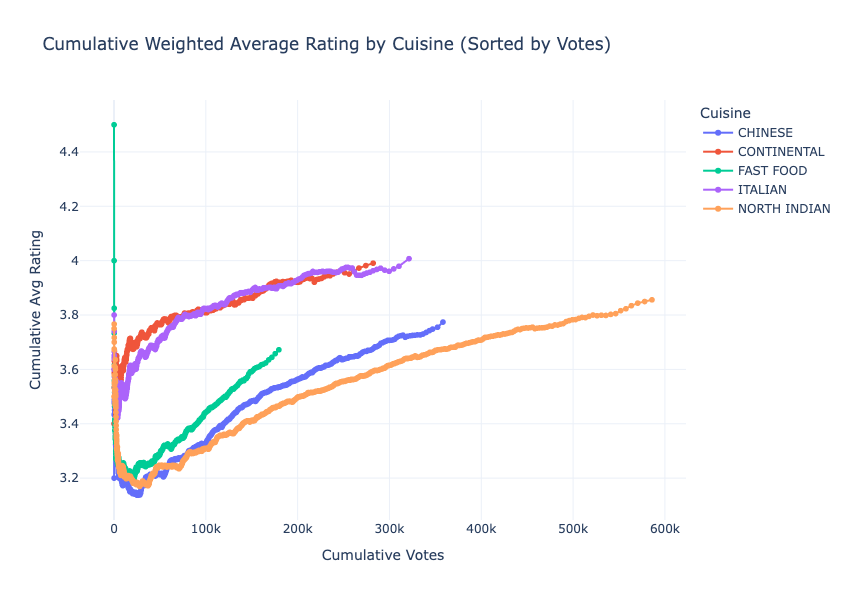

In [87]:
import pandas as pd
import plotly.express as px

# Step 1: Clean data — remove rows with 0 votes or 0 rating
df_clean = df[(df['Votes'] > 0) & (df['Aggregate rating'] > 0)].copy()

# Step 2: Focus on top cuisines (top 5 for clarity)
top_cuisines = df_clean['Cuisines'].value_counts().head(5).index
df_top = df_clean[df_clean['Cuisines'].isin(top_cuisines)].copy()

# Step 3: Sort by Cuisine and Votes
df_top.sort_values(by=['Cuisines', 'Votes'], inplace=True)

# Step 4: Calculate cumulative votes and cumulative rating sum per cuisine
df_top['Cumulative Votes'] = df_top.groupby('Cuisines')['Votes'].cumsum()
df_top['Cumulative Rating Sum'] = (df_top['Aggregate rating'] * df_top['Votes'])\
    .groupby(df_top['Cuisines']).transform('cumsum')

# Step 5: Compute cumulative weighted average rating
df_top['Cumulative Weighted Rating'] = df_top['Cumulative Rating Sum'] / df_top['Cumulative Votes']

# Step 6: Plot it
fig = px.line(
    df_top,
    x='Cumulative Votes',
    y='Cumulative Weighted Rating',
    color='Cuisines',
    title='Cumulative Weighted Average Rating by Cuisine (Sorted by Votes)',
    labels={
        'Cumulative Votes': 'Cumulative Votes',
        'Cumulative Weighted Rating': 'Cumulative Avg Rating',
        'Cuisines': 'Cuisine'
    },
    markers=True
)

fig.update_layout(template='plotly_white', height=600, width=950)
fig.show()


# 🍽️ Cuisine Popularity and Ratings Analysis

---

## 📊 Most Popular Cuisines (by Votes and Number of Restaurants)

| Cuisine        | Restaurants | Votes    | Observation                            |
|----------------|-------------|----------|----------------------------------------|
| **North Indian** | 2,004       | 585,900  | 🔺 Most widely available and reviewed   |
| **Chinese**       | 1,507       | 358,300  | 🔸 Very popular, especially in cities   |
| **Fast Food**     | 1,020       | 179,550  | 🔹 Common choice, especially for youth  |

---

## ⭐ Average Ratings by Cuisine

| Cuisine        | Avg Rating | Notes                                                  |
|----------------|------------|--------------------------------------------------------|
| **North Indian** | 3.44       | Moderate satisfaction despite high popularity         |
| **Chinese**       | 3.41       | Popular but lower average ratings                    |
| **Fast Food**     | 3.38       | Economical but rated lower                          |
| **Continental**   | 3.79       | High satisfaction, premium experience               |
| **Café**          | 3.79       | Consistently well-rated casual dining               |
| **American**      | 3.79       | Familiar, well-received cuisine                     |
| **Italian**       | 3.78       | Fewer restaurants, but high-quality ratings         |

---

## 🔍 Top-Rated Niche Cuisines

These cuisines have **fewer restaurants** but **exceptionally high ratings**:

| Cuisine        | Avg Rating |
|----------------|------------|
| **Sunda**       | 4.9        |
| **Taiwanese**   | 4.6        |
| **Persian**     | 4.6        |
| **Ramen**       | 4.5        |
| **Brazilian**   | 4.5        |
| **Dim Sum**     | 4.5        |
| **Hawaiian**    | 4.4        |
| **Bubble Tea**  | 4.4        |
| **Curry**       | 4.4        |
| **Filipino**    | 4.3        |

> 🧠 *Niche cuisines often reflect premium, authentic experiences with loyal customers.*

---

## 📈 Trends from Graphs

- **Dip in Ratings (1K–10K votes):**  
  All major cuisines experience a drop in average ratings in this vote range.

- **Ratings Improve with More Votes:**  
  As votes accumulate, ratings tend to stabilize and rise.

- **Continental and Italian Excel:**  
  These cuisines maintain high ratings (near 3.9–4.0) across cumulative vote buckets.

- **North Indian and Chinese Lag Behind:**  
  Rarely exceed 3.6 average rating, even with higher vote counts.

---

## ✅ Key Insights

### 🔸 Popularity ≠ High Ratings  
- **North Indian** and **Chinese** are the most reviewed but do **not** score the highest in ratings.

### 🥇 Consistent High Performers  
- **Continental**, **Italian**, **Café**, and **American** cuisines consistently maintain **high average ratings**.

### 🌟 Niche Cuisines Are Hidden Gems  
- Cuisines like **Sunda**, **Persian**, and **Taiwanese** show **exceptionally high satisfaction**.

---



## Task 3: Data Visualization
### Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).
### Compare the average ratings of different cuisines or cities using appropriate visualizations.
### Visualize the relationship between various features and the target variable to gain insights.

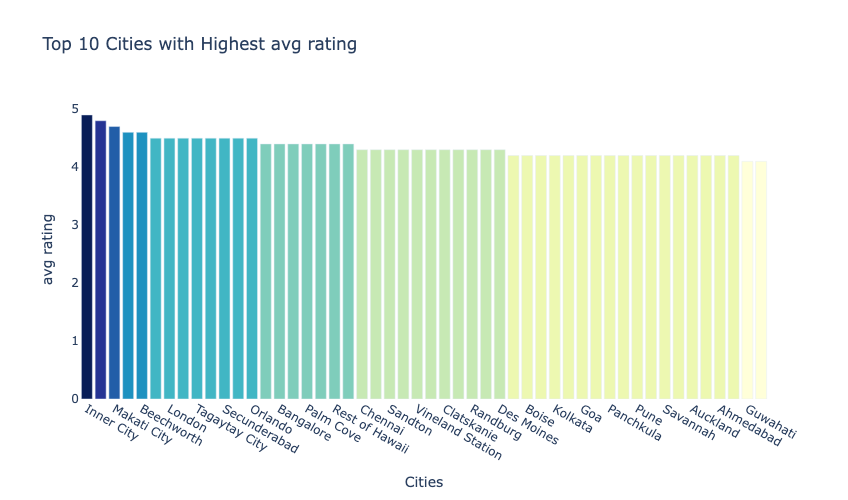

In [89]:
city_avg = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
top_city = city_avg.head(50).reset_index()
top_city.columns = ["City","Avg"]
def round_to_one_decimal(number):
    return np.round(number, 1)
# top_cuisines["Rating"] = top_cuisines["Rating"].apply(round_to_one_decimal)
top_city['Avg'] = top_city['Avg'].apply(round_to_one_decimal)
# top_cuisines[]
# Plotting
fig = px.bar(
    top_city,
    x="City",
    y="Avg",
    # orientation='v',
    labels={'City': 'Cities', 'Avg': 'Avg rating'},
    title='Top 10 Cities with Highest avg rating',
    color='Avg',
    color_continuous_scale='YlGnBu'
)

# Styling the plot
fig.update_layout(
    xaxis_title="Cities",
    yaxis_title="avg rating",
    coloraxis_showscale=False,
    plot_bgcolor='rgba(0,0,0,0)',
    height = 500,
    width = 1000
)

fig.show()


In [81]:
df_clean = df[(df['Votes'] > 0) & (df['Aggregate rating'] > 0)]

df_clean['Cuisines'] = df_clean['Cuisines'].str.strip().str.upper()
cuisine_rating = df_clean.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
top_cuisines = cuisine_rating.head(10).reset_index()
top_cuisines.columns = ["Cuisines","Rating"]
def round_to_one_decimal(number):
    return np.round(number, 1)
top_cuisines["Rating"] = top_cuisines["Rating"].apply(round_to_one_decimal)
# top_cuisines[]
# Plotting
fig = px.bar(
    top_cuisines,
    x="Rating",
    y="Cuisines",
    orientation='h',
    labels={'Rating': 'Average Rating', 'Cuisines': 'Cuisine'},
    title='Top 10 Cuisines by Average Restaurant Rating',
    color='Rating',
    color_continuous_scale='Viridis'
)

# Styling the plot
fig.update_layout(
    xaxis_title="Average Rating",
    yaxis_title="Cuisine",
    coloraxis_showscale=False,
    plot_bgcolor='rgba(0,0,0,0)',
    height = 500,
    width = 1000
)

fig.show()


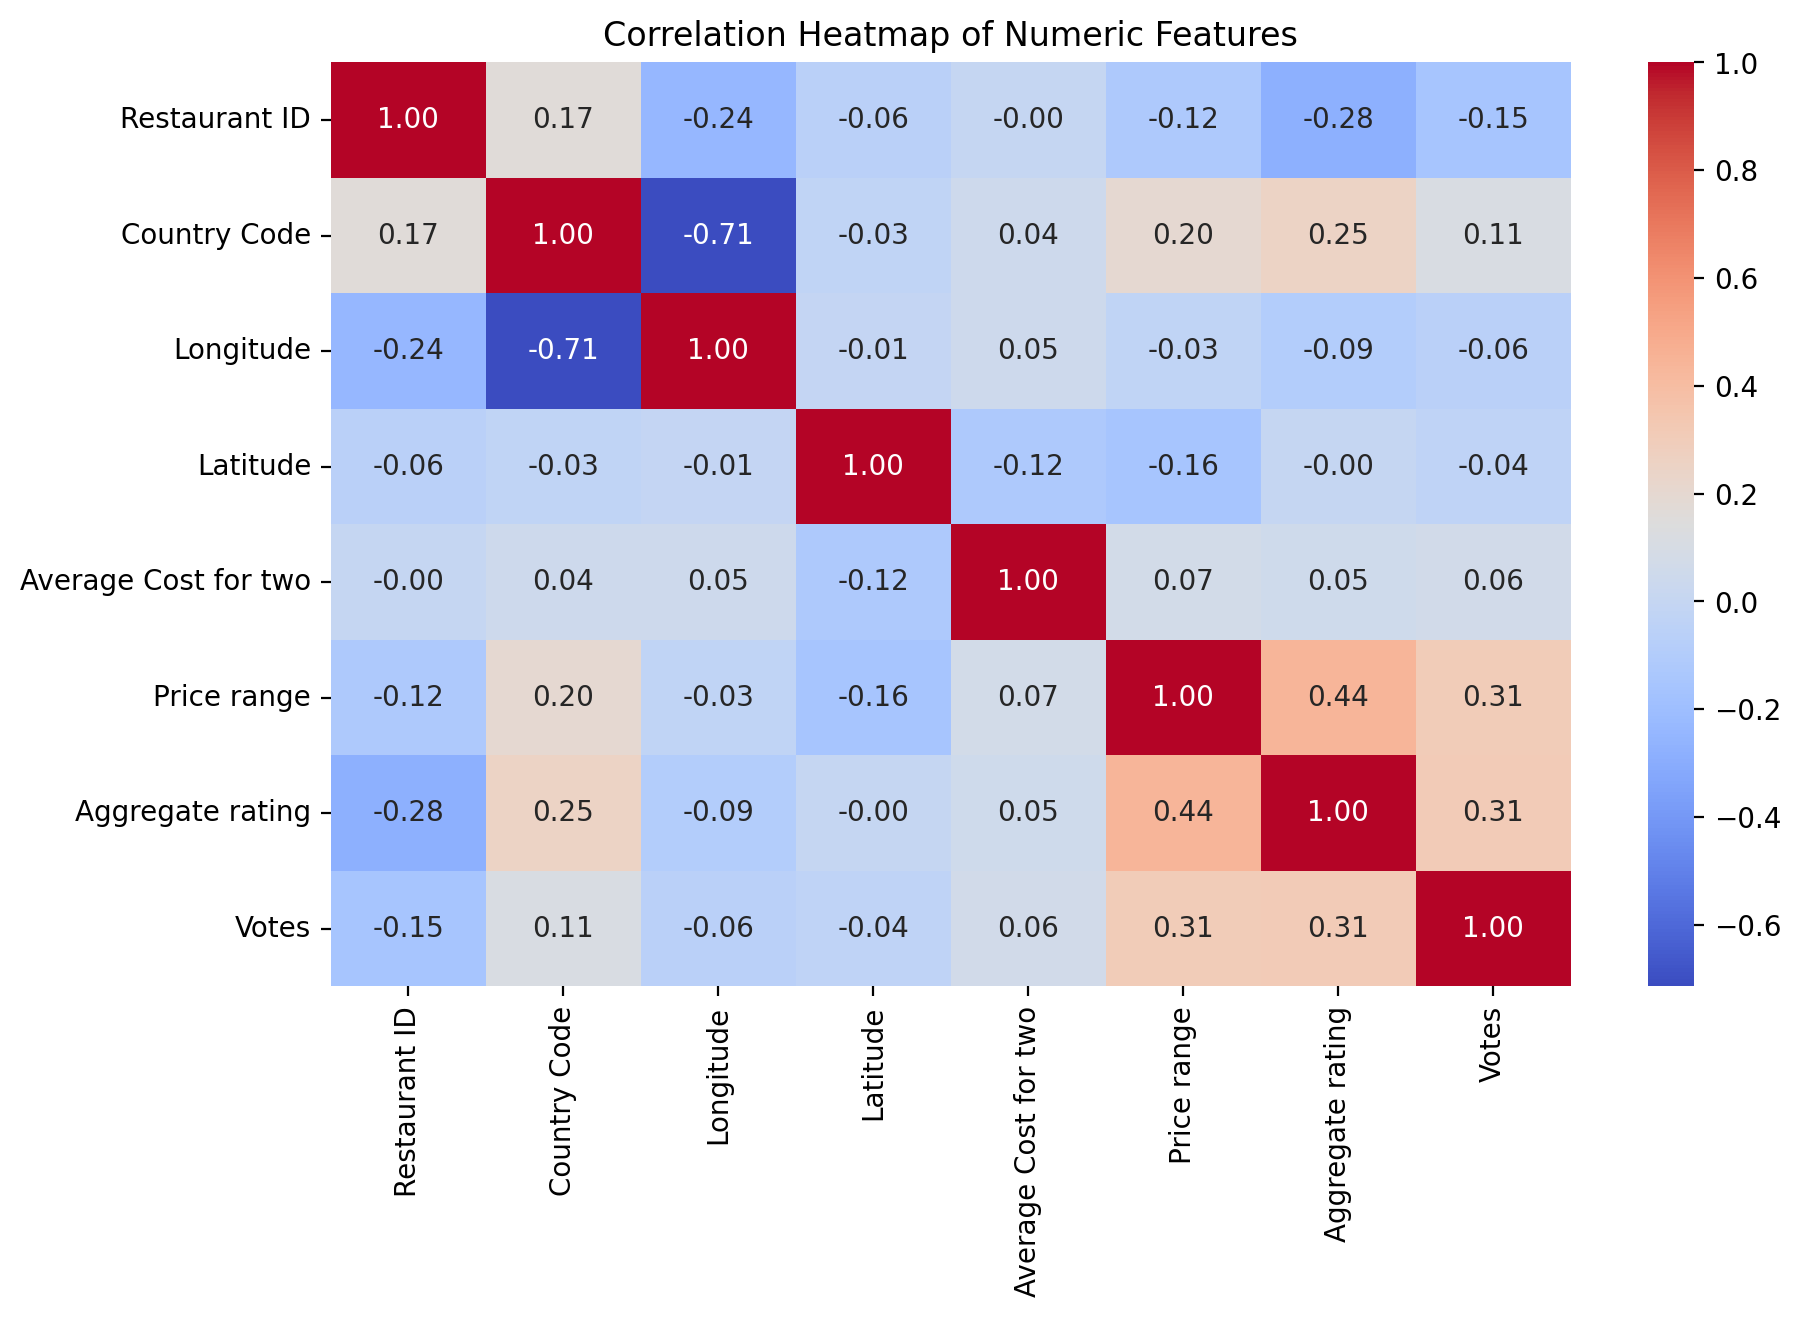

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [93]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Violin plot for rating distribution across top 10 cuisines
top_cuisines_list = df['Cuisines'].value_counts().head(10).index.tolist()
filtered_df = df[df['Cuisines'].isin(top_cuisines_list)]
fig = px.violin(filtered_df, y='Aggregate rating', x='Cuisines', color='Cuisines',
                box=True, points='all',
                title='Rating Distribution by Top 10 Cuisines')
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(height = 500 ,width = 1000)

fig.show()

# Bar plot: Average rating by price range
avg_rating_price = df.groupby('Price range')['Aggregate rating'].mean().reset_index()
fig = px.bar(avg_rating_price, x='Price range', y='Aggregate rating',
             title='Average Aggregate Rating by Price Range',
             labels={'Price range': 'Price Range', 'Aggregate rating': 'Average Rating'},
             color='Aggregate rating', color_continuous_scale='Viridis')
fig.update_layout(height = 500 ,width = 1000)

fig.show()

# Box plot of Aggregate rating by 'Has Table booking'
fig = px.box(df, x='Has Table booking', y='Aggregate rating',
             title='Aggregate Rating Distribution by Table Booking Availability',
             points='all')
fig.update_layout(height = 500 ,width = 1000)

fig.show()

# Scatter plot with regression line for Votes vs Aggregate rating
fig = px.scatter(df, x='Votes', y='Aggregate rating', trendline='ols',
                 title='Votes vs Aggregate Rating')
fig.update_layout(height = 500 ,width = 1000)

fig.show()


# Conclusion & Insights

## 📊 Top Cuisines by Average Rating

Some cuisines consistently receive higher average ratings. For example:

- **Sunda**
- **Taiwanese**
- **Persian**
- **Ramen**

> 🥇 **Sunda cuisine** stands out as the **highest rated**.

This suggests that **customer satisfaction (as reflected in ratings)** may be **strongly influenced by the type of cuisine** offered.

---

## 🎻 Rating Distribution by Cuisine

The **violin plot** shows that even among the most popular cuisines — such as:

- Desserts
- Chinese
- Cafe
- Italian

There is a **wide spread of ratings**.

- **Desserts** and **Continental** tend to have:
  - **Higher median ratings**
  - **Less variability**

- **Fast Food** and **Bakery** show:
  - **Broader spread**
  - **More mixed customer experiences**

> 💡 **Popularity doesn’t always mean consistently high ratings.**

---

## 💸 Price Range vs. Average Rating

There’s a **clear upward trend**:

- **Higher price ranges** are associated with **higher average ratings**
- **Lowest price range** → **Lowest average rating**
- **Highest price range** → **Highest average rating**

> 📈 This could indicate that:
> - Customers expect (and reward) **better quality or experience** at **pricier restaurants**
> - Higher-end establishments may **invest more in quality and service**

---

## 🗳️ Votes vs. Aggregate Rating

There is a **weak positive correlation** between:

- Number of **votes**
- **Aggregate rating**

However:

- The **relationship is not strong** (low R² value)
- Many **exceptions** exist

> 🤔 This suggests:
> - **Popularity (votes)** can help boost ratings, but...
> - **Quality and experience** play a more **significant role**

---

## 🔑 Key Conclusions

### ✅ Cuisine Type Matters
Certain cuisines are more likely to earn **high average ratings**, possibly due to:
- Unique flavors
- Novelty
- Quality of preparation

### 💰 Price Reflects Perceived Value
Higher-priced restaurants generally receive **better ratings**, hinting that:
- Customers associate **price with quality or experience**

### 🚫 Popularity Isn’t Everything
While more votes can mean a higher rating, the effect is **small**:
- A restaurant can be **popular** but not necessarily **top-rated**

### 📉 Rating Spread Is Important
Even within popular cuisines:
- There’s **a lot of variability**
- **Consistency in quality** may be a **challenge** for some cuisine types
